In [144]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt 

In [105]:
pwd

'/home/homa/spiced_projects/buynilla/data'

In [106]:
path = '/home/homa/spiced_projects/buynilla/data'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)

['tuesday.csv', 'wednesday.csv', 'friday.csv', 'monday.csv', 'thursday.csv']


In [126]:
df= pd.DataFrame()
for i in result:
    df_test = pd.read_csv(f'{i}', sep=';', index_col=0, parse_dates=True)
    df = pd.concat([df, df_test])
    df = df.sort_index()

In [127]:
df['customer_id'] = df['customer_no']

In [128]:
for i in df.index.day.unique():
    rowIndex = df.index[df.index.day > i]
    df.loc[rowIndex,'customer_id'] = df.loc[rowIndex,'customer_id'] + df[df.index.day == i]['customer_no'].max()

In [129]:
df

,customer_no,location,customer_id
timestamp,,,
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:03:00,1,dairy,1
2019-09-02 07:04:00,8,fruit,8
2019-09-02 07:04:00,7,spices,7
2019-09-02 07:04:00,3,dairy,3
...,...,...,...
2019-09-06 21:50:00,1509,drinks,7444
2019-09-06 21:50:00,1508,checkout,7443
2019-09-06 21:50:00,1507,checkout,7442


1. Calculate the total number of customers in each section

In [112]:
df.groupby('location')[['customer_id']].count()

,customer_id
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


<AxesSubplot:xlabel='location'>

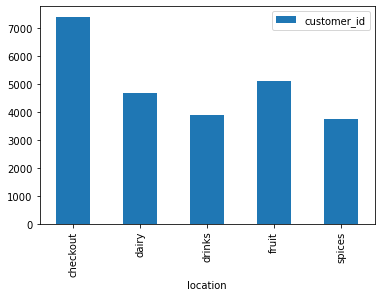

In [113]:
df.groupby('location')[['customer_id']].count().plot.bar()

2. Calculate the total number of customers in each section over time

In [114]:
# total number of customers per timestamp and location
df.groupby([df.index, 'location'])[["customer_id"]].count()

customer_id
timestamp           location             
2019-09-02 07:03:00 dairy               2
2019-09-02 07:04:00 dairy               2
                    fruit               1
                    spices              3
2019-09-02 07:05:00 checkout            2
...                                   ...
2019-09-06 21:50:00 checkout            2
                    dairy               1
                    drinks              1
                    fruit               1
                    spices              1

[13839 rows x 1 columns]

In [130]:
df['time'] = df.index.time

,customer_no,location,customer_id,time
timestamp,,,,
2019-09-02 07:03:00,2,dairy,2,07:03:00
2019-09-02 07:03:00,1,dairy,1,07:03:00
2019-09-02 07:04:00,8,fruit,8,07:04:00
2019-09-02 07:04:00,7,spices,7,07:04:00
2019-09-02 07:04:00,3,dairy,3,07:04:00
...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,7444,21:50:00
2019-09-06 21:50:00,1508,checkout,7443,21:50:00
2019-09-06 21:50:00,1507,checkout,7442,21:50:00


In [118]:
# total number of customers per minute and location
df.groupby(['time', 'location'])[["customer_id"]].count()

customer_id
time     location             
07:00:00 dairy               3
         drinks              3
         fruit               4
07:01:00 checkout            2
         dairy               4
...                        ...
21:50:00 checkout            2
         dairy               3
         drinks              1
         fruit               2
         spices              1

[4383 rows x 1 columns]

3. Display the number of customers at checkout over time

In [131]:
#per timestamp
df_check = df[df['location'] == 'checkout']
df_check.groupby(df_check.index)['customer_id'].count()

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-06 21:37:00    1
2019-09-06 21:45:00    1
2019-09-06 21:47:00    2
2019-09-06 21:48:00    2
2019-09-06 21:50:00    2
Name: customer_id, Length: 3460, dtype: int64

In [132]:
#per minute
df_check = df[df['location'] == 'checkout']
df_check.groupby('time')['customer_id'].count()

time
07:01:00    2
07:02:00    5
07:03:00    1
07:04:00    2
07:05:00    7
           ..
21:46:00    5
21:47:00    5
21:48:00    7
21:49:00    6
21:50:00    2
Name: customer_id, Length: 890, dtype: int64

<ipython-input-150-e30782d70401>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


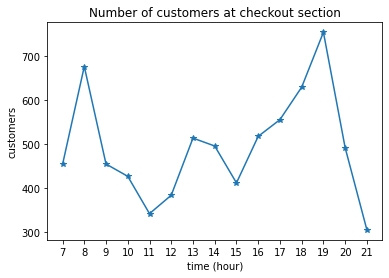

In [150]:
df['hour'] =df.index.hour
location_group = df.groupby(['location'])
#customers at checkout per hour
plt.plot(location_group.get_group('checkout').groupby('hour').size().index, location_group.get_group('checkout').groupby('hour').size().values, marker='*')
ax = plt.subplot()
ax.set_xticks(location_group.get_group('checkout').groupby('hour').size().index)
plt.ylabel('customers')
plt.xlabel('time (hour)')
plt.title('Number of customers at checkout section')
plt.show()

4. Calculate the time each customer spent in the market

In [133]:
for i in df['customer_id'].unique():
    df_sub = df.loc[(df['customer_id']==i)]
    time = df_sub.index.unique().max() - df_sub.index.unique().min() 
    print(f'customer No. {i}, spend {time}')    

customer No. 2, spend 0 days 00:03:00
customer No. 1, spend 0 days 00:02:00
customer No. 8, spend 0 days 00:03:00
customer No. 7, spend 0 days 00:09:00
customer No. 3, spend 0 days 00:02:00
customer No. 5, spend 0 days 00:01:00
customer No. 6, spend 0 days 00:25:00
customer No. 4, spend 0 days 00:04:00
customer No. 12, spend 0 days 00:04:00
customer No. 14, spend 0 days 00:03:00
customer No. 13, spend 0 days 00:10:00
customer No. 11, spend 0 days 00:02:00
customer No. 10, spend 0 days 00:02:00
customer No. 9, spend 0 days 00:07:00
customer No. 15, spend 0 days 00:05:00
customer No. 16, spend 0 days 00:04:00
customer No. 17, spend 0 days 00:11:00
customer No. 18, spend 0 days 00:05:00
customer No. 19, spend 0 days 00:08:00
customer No. 20, spend 0 days 00:02:00
customer No. 21, spend 0 days 00:03:00
customer No. 22, spend 0 days 00:04:00
customer No. 23, spend 0 days 00:01:00
customer No. 24, spend 0 days 00:06:00
customer No. 29, spend 0 days 00:02:00
customer No. 28, spend 0 days 00:0

5. Calculate the total number of customers in the supermarket over time.

In [134]:
df.groupby(df.index)['customer_no'].count()

timestamp
2019-09-02 07:03:00    2
2019-09-02 07:04:00    6
2019-09-02 07:05:00    4
2019-09-02 07:06:00    8
2019-09-02 07:07:00    4
                      ..
2019-09-06 21:46:00    5
2019-09-06 21:47:00    4
2019-09-06 21:48:00    7
2019-09-06 21:49:00    4
2019-09-06 21:50:00    6
Name: customer_no, Length: 4363, dtype: int64

6. Our business managers think that the first section customers visit follows a different pattern than the following ones. 
- Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [135]:
enter_datetimes = df.reset_index().groupby("customer_id")["timestamp"].min()
enter_datetimes 

customer_id
1      2019-09-02 07:03:00
2      2019-09-02 07:03:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
5      2019-09-02 07:04:00
               ...        
7441   2019-09-06 21:48:00
7442   2019-09-06 21:48:00
7443   2019-09-06 21:48:00
7444   2019-09-06 21:50:00
7445   2019-09-06 21:50:00
Name: timestamp, Length: 7445, dtype: datetime64[ns]

In [136]:
for customer in df["customer_id"].unique():
    df.loc[(df.customer_id == customer) & (df.index == enter_datetimes[customer]),
        "section_order"] = "first"

In [137]:
df.loc[df["location"] == "checkout", "section_order"] = "checkout"
df["section_order"].fillna("following", inplace=True)
df

,customer_no,location,customer_id,time,section_order
timestamp,,,,,
2019-09-02 07:03:00,2,dairy,2,07:03:00,first
2019-09-02 07:03:00,1,dairy,1,07:03:00,first
2019-09-02 07:04:00,8,fruit,8,07:04:00,first
2019-09-02 07:04:00,7,spices,7,07:04:00,first
2019-09-02 07:04:00,3,dairy,3,07:04:00,first
...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,7444,21:50:00,first
2019-09-06 21:50:00,1508,checkout,7443,21:50:00,checkout
2019-09-06 21:50:00,1507,checkout,7442,21:50:00,checkout


In [180]:
customers_in_first = df[df['section_order'] == 'first'].groupby(['time'])[['customer_id']].count()
customers_in_following = df[df['section_order'] == 'following'].groupby(['time'])[['customer_id']].count()

<AxesSubplot:xlabel='time'>

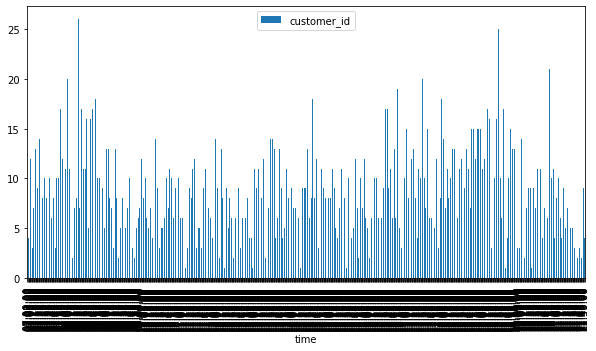

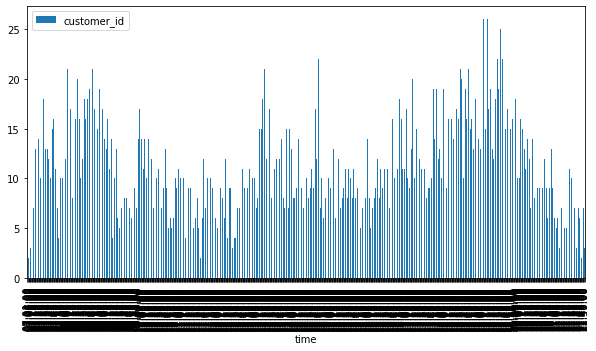

In [181]:
customers_in_first.plot.bar(figsize=(10,5))
customers_in_following.plot.bar(figsize=(10,5))

Get Transition Propabilities


In [90]:
df['transition'] = df['section_order'].shift(-1)

In [91]:
P = pd.crosstab(df['section_order'], df['transition'], normalize='index')
P

transition,checkout,first,following
section_order,,,
checkout,0.354321,0.188081,0.457597
first,0.179584,0.561451,0.258966
following,0.344717,0.186639,0.468644


or

In [101]:
df.groupby(['location', 'transition']).count()

In [164]:
df['transition'] = df['location'].shift(-1)

In [194]:
P = pd.crosstab(df['location'], df['transition'], normalize='index')
P

transition  checkout     dairy    drinks     fruit    spices
location                                                    
checkout    0.354321  0.171768  0.151948  0.178509  0.143454
dairy       0.260098  0.201111  0.159863  0.220346  0.158581
drinks      0.293982  0.191037  0.168502  0.202817  0.143662
fruit       0.259910  0.192931  0.159344  0.225347  0.162468
spices      0.291156  0.194193  0.148109  0.218700  0.147842


In [191]:
from pprint import pprint 
import networkx as nx

In [197]:
# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(P)
#pprint(edges_wts)

In [196]:
states = ['checkout ', 'dairy', 'drinks', 'fruit', 'spices']
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')


Nodes:
['checkout ', 'dairy', 'drinks', 'fruit', 'spices']

Edges:
OutMultiEdgeDataView([('dairy', 'checkout', {'weight': 0.2600983116050438, 'label': 0.2600983116050438}), ('dairy', 'dairy', {'weight': 0.20111134857875615, 'label': 0.20111134857875615}), ('dairy', 'drinks', {'weight': 0.15986321863646077, 'label': 0.15986321863646077}), ('dairy', 'fruit', {'weight': 0.22034622782645866, 'label': 0.22034622782645866}), ('dairy', 'spices', {'weight': 0.15858089335328063, 'label': 0.15858089335328063}), ('drinks', 'checkout', {'weight': 0.2939820742637644, 'label': 0.2939820742637644}), ('drinks', 'dairy', {'weight': 0.1910371318822023, 'label': 0.1910371318822023}), ('drinks', 'drinks', {'weight': 0.16850192061459668, 'label': 0.16850192061459668}), ('drinks', 'fruit', {'weight': 0.2028169014084507, 'label': 0.2028169014084507}), ('drinks', 'spices', {'weight': 0.14366197183098592, 'label': 0.14366197183098592}), ('fruit', 'checkout', {'weight': 0.2599101737941808, 'label': 0.2599101737

ModuleNotFoundError: No module named 'pydot'

Draw transition probabilities

In [186]:
#pip install pygraphviz

#pip install pydotplus
#pip install graphviz
pip install pygraphviz
#import pydot

SyntaxError: invalid syntax (<ipython-input-186-dc3e0cae1438>, line 5)

In [183]:
import pygraphviz as pgv

ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
locations = ["dairy", "spices", "drinks", "fruit", "checkout"]
G = pgv.AGraph(directed=True)
for start_location in locations[:-1]:
    for end_location in locations:
        G.add_edge(
            start_location,
            end_location,
            label=np.round(P.loc[start_location, end_location], 2),
        )

G.draw("transition.png", prog="dot")

In [160]:
df['day'] = df.index.day_name()
df['time'] = df.index.time

,customer_no,location,customer_id,time,section_order,hour,day
timestamp,,,,,,,
2019-09-02 07:03:00,2,dairy,2,07:03:00,first,7,Monday
2019-09-02 07:03:00,1,dairy,1,07:03:00,first,7,Monday
2019-09-02 07:04:00,8,fruit,8,07:04:00,first,7,Monday
2019-09-02 07:04:00,7,spices,7,07:04:00,first,7,Monday
2019-09-02 07:04:00,3,dairy,3,07:04:00,first,7,Monday
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,7444,21:50:00,first,21,Friday
2019-09-06 21:50:00,1508,checkout,7443,21:50:00,checkout,21,Friday
2019-09-06 21:50:00,1507,checkout,7442,21:50:00,checkout,21,Friday


<AxesSubplot:xlabel='timestamp'>

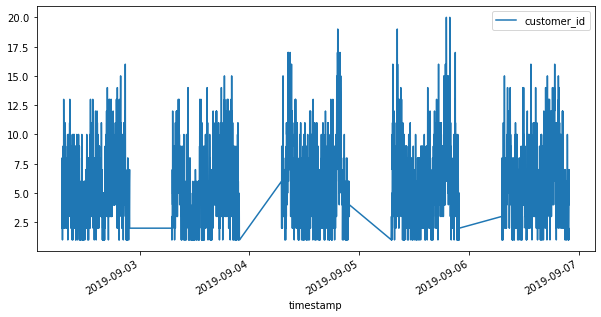

In [99]:
# distribution over week
df.groupby(df.index)[["customer_id"]].count().plot(figsize=(10,5))

<AxesSubplot:xlabel='time'>

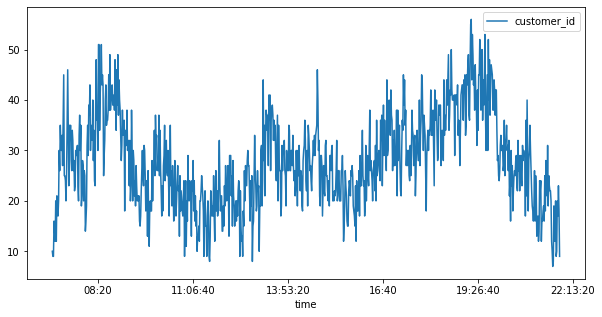

In [100]:
# distribution over a day 
(df.groupby(df.time)[["customer_id"]].count()).plot(figsize=(10, 5))